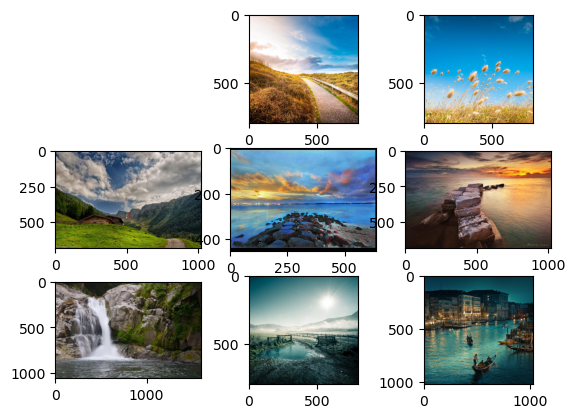

In [1]:
# plot the first 9 images in the landscape dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = 'train/'
# plot first few images
for i in range(1,9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 't' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [18]:
# load and summarize the mapping file for the landscape dataset
from pandas import read_csv
# load file as CSV
filename = r'C:\Users\pc\Desktop\LANDSCAPE\train_landscape.csv'
mapping_csv = read_csv(filename)
# summarize properties
print(mapping_csv.shape)
print(mapping_csv[:10])


(25, 12)
  image_name                               tags  clouds  houses  hills  trees  \
0         t1              clouds,hills,soil,sun       1       0      1      0   
1         t2                clouds,flowers,soil       1       0      0      0   
2         t3     clouds,trees,hills,houses,soil       1       1      1      1   
3         t4        clouds,water,sun,soil,rocks       1       0      0      0   
4         t5             clouds,water,sun,rocks       1       0      0      0   
5         t6                        water,rocks       0       0      0      0   
6         t7  clouds,water,sun,soil,rocks,hills       1       0      1      0   
7         t8                       houses,water       0       1      0      0   
8         t9                       clouds,hills       1       0      1      0   
9        t10                  clouds,hills,soil       1       0      1      0   

   flowers  bridge  soil  sun  water  rocks  
0        0       0     1    1      0      0  
1      

In [3]:
# create a mapping of tags to integers
from pandas import read_csv
 
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
	# create a set of all known tags
	labels = set()
	for i in range(len(mapping_csv)):
		# convert spaced separated tags into an array of tags
		tags = mapping_csv['tags'][i].split(' ')
		# add tags to the set of known labels
		labels.update(tags)
	# convert set of labels to a list to list
	labels = list(labels)
	# order set alphabetically
	labels.sort()
	# dict that maps labels to integers, and the reverse
	labels_map = {labels[i]:i for i in range(len(labels))}
	inv_labels_map = {i:labels[i] for i in range(len(labels))}
	return labels_map, inv_labels_map
 
# load file as CSV
filename = r'C:\Users\pc\Desktop\LANDSCAPE\train_landscape.csv'
mapping_csv = read_csv(filename)
# create a mapping of tags to integers
mapping, inv_mapping = create_tag_mapping(mapping_csv)
print(len(mapping))
print(mapping)

23
{'clouds,flowers,soil': 0, 'clouds,hills': 1, 'clouds,hills,soil': 2, 'clouds,hills,soil,sun': 3, 'clouds,hills,trees,water': 4, 'clouds,hills,water,soil': 5, 'clouds,houses,hills,trees,soil': 6, 'clouds,soil': 7, 'clouds,trees,hills,houses,soil': 8, 'clouds,trees,hills,soil': 9, 'clouds,water,houses,rocks,soil': 10, 'clouds,water,rocks,soil': 11, 'clouds,water,sun,rocks': 12, 'clouds,water,sun,rocks,soil': 13, 'clouds,water,sun,soil,rocks': 14, 'clouds,water,sun,soil,rocks,hills': 15, 'hills,water,flowers,trees': 16, 'houses,water': 17, 'sun,water,rocks,soil': 18, 'sun,water,soil': 19, 'trees,flowers,rocks,water': 20, 'trees,water,bridge,hills,soil': 21, 'water,rocks': 22}


In [4]:

# create a mapping of filename to tags
def create_file_mapping(mapping_csv):
	mapping = dict()
	for i in range(len(mapping_csv)):
		name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
		mapping[name] = tags.split(' ')
	return mapping

In [5]:

# load and prepare landscape dataset and save to file
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed
from pandas import read_csv
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
 
# create a mapping of tags to integers given the loaded mapping file
def create_tag_mapping(mapping_csv):
	# create a set of all known tags
	labels = set()
	for i in range(len(mapping_csv)):
		# convert spaced separated tags into an array of tags
		tags = mapping_csv['tags'][i].split(' ')
		# add tags to the set of known labels
		labels.update(tags)
	# convert set of labels to a list to list
	labels = list(labels)
	# order set alphabetically
	labels.sort()
	# dict that maps labels to integers, and the reverse
	labels_map = {labels[i]:i for i in range(len(labels))}
	inv_labels_map = {i:labels[i] for i in range(len(labels))}
	return labels_map, inv_labels_map
 
# create a mapping of filename to a list of tags
def create_file_mapping(mapping_csv):
	mapping = dict()
	for i in range(len(mapping_csv)):
		name, tags = mapping_csv['image_name'][i], mapping_csv['tags'][i]
		mapping[name] = tags.split(' ')
	return mapping
 
# create a one hot encoding for one list of tags
def one_hot_encode(tags, mapping):
	# create empty vector
	encoding = zeros(len(mapping), dtype='uint8')
	# mark 1 for each tag in the vector
	for tag in tags:
		encoding[mapping[tag]] = 1
	return encoding
 
# load all images into memory
def load_dataset(path, file_mapping, tag_mapping):
	photos, targets = list(), list()
	# enumerate files in the directory
	for filename in listdir(folder):
		# load image
		photo = load_img(path + filename, target_size=(128,128))
		# convert to numpy array
		photo = img_to_array(photo, dtype='uint8')
		# get tags
		tags = file_mapping[filename[:-4]]
		# one hot encode tags
		target = one_hot_encode(tags, tag_mapping)
		# store
		photos.append(photo)
		targets.append(target)
	X = asarray(photos, dtype='uint8')
	y = asarray(targets, dtype='uint8')
	return X, y
 
# load the mapping file
filename = r'C:\Users\pc\Desktop\LANDSCAPE\train_landscape.csv'
mapping_csv = read_csv(filename)
# create a mapping of tags to integers
tag_mapping, _ = create_tag_mapping(mapping_csv)
# create a mapping of filenames to tag lists
file_mapping = create_file_mapping(mapping_csv)
# load the jpeg images
folder = 'train/'
X, y = load_dataset(folder, file_mapping, tag_mapping)
print(X.shape, y.shape)
# save both arrays to one file in compressed format
savez_compressed(r'C:\Users\pc\Desktop\LANDSCAPE\land.zip', X, y)

(25, 128, 128, 3) (25, 23)


In [6]:
#precision = true positives / (true positives + false positives)
#recall = true positives / (true positives + false negatives)
#F1 = 2 x (precision x recall) / (precision + recall)
#F-Beta = (1 + Beta^2) x (precision x recall) / (Beta^2 x precision + recall)
#score = fbeta_score(y_true, y_pred, 2, average='samples')


In [7]:
# test f-beta score
from numpy import load
from numpy import ones
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\land.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# load dataset
trainX, trainY, testX, testY = load_dataset()
# make all one predictions
train_yhat = asarray([ones(trainY.shape[1]) for _ in range(trainY.shape[0])])
test_yhat = asarray([ones(testY.shape[1]) for _ in range(testY.shape[0])])
# evaluate predictions
train_score = fbeta_score(trainY, train_yhat, average='samples',beta=1)
test_score = fbeta_score(testY, test_yhat, average='samples',beta=1)
print('All Ones: train=%.3f, test=%.3f' % (train_score, test_score))

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
All Ones: train=0.083, test=0.083


In [8]:
# compare f-beta score between sklearn and keras
from numpy import load
from numpy import ones
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from keras import backend
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\land.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# calculate fbeta score for multi-label classification
def fbeta(y_true, y_pred, beta=1):
	# clip predictions
	y_pred = backend.clip(y_pred, 0, 1)
	# calculate elements
	tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + backend.epsilon())
	# calculate recall
	r = tp / (tp + fn + backend.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 10
	fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
	return fbeta_score
 
# load dataset
trainX, trainY, testX, testY = load_dataset()
# make all one predictions
train_yhat = asarray([ones(trainY.shape[1]) for _ in range(trainY.shape[0])])
test_yhat = asarray([ones(testY.shape[1]) for _ in range(testY.shape[0])])
# evaluate predictions with sklearn
train_score = fbeta_score(trainY, train_yhat, average='samples',beta=1)
test_score = fbeta_score(testY, test_yhat, average='samples',beta=1)
print('All Ones (sklearn): train=%.3f, test=%.3f' % (train_score, test_score))
# evaluate predictions with keras
train_score = fbeta(backend.variable(trainY), backend.variable(train_yhat))
test_score = fbeta(backend.variable(testY), backend.variable(test_yhat))
print('All Ones (keras): train=%.3f, test=%.3f' % (train_score, test_score))

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
All Ones (sklearn): train=0.083, test=0.083
All Ones (keras): train=0.083, test=0.083


In [9]:
# baseline model for the landscape dataset
import sys
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\land.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# calculate fbeta score for multi-label classification
def fbeta(y_true, y_pred, beta=1):
    # clip predictions
    y_pred = backend.clip(y_pred, 0, 1)
    # calculate elements
    tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
    # calculate precision
    p = tp / (tp + fp + backend.epsilon())
    # calculate recall
    r = tp / (tp + fn + backend.epsilon())
    # calculate fbeta, averaged across each class
    bb = beta ** 10
    fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
    print('precision',p)
    return fbeta_score
 
 # define cnn model
def define_model(in_shape=(128, 128, 3), out_shape=23):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(out_shape, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
    print(model.summary())
    return model
print(define_model())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       7

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
co

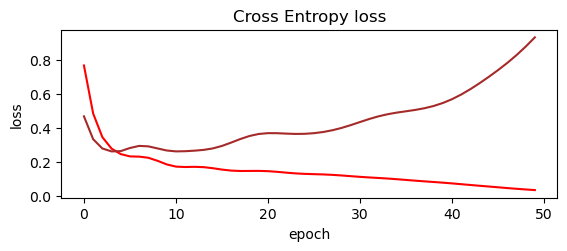

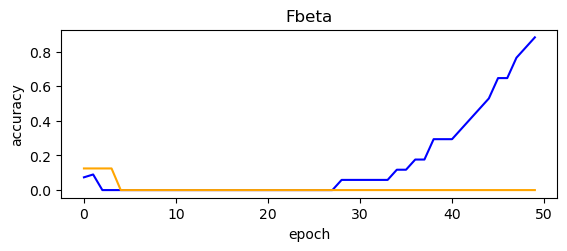

In [10]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(212)
    pyplot.title('Cross Entropy loss')
    pyplot.plot(history.history['loss'], color='red', label='train')
    pyplot.plot(history.history['val_loss'], color='brown', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('loss')
    pyplot.show()
    # plot accuracy
    pyplot.subplot(211)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='blue', label='train')
    pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('accuracy')
    pyplot.show()
    
    # save plot to file
    folder = sys.argv[0].split('/')[-1]
    pyplot.savefig(folder + '_plot.png')
    pyplot.close()
 
 #run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = datagen.flow(trainX, trainY, batch_size=128)
    test_it = datagen.flow(testX, testY, batch_size=128)
    # define model
    model = define_model()
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    print(history)
    # evaluate model
    loss, fbeta = model.evaluate(test_it, steps=len(test_it), verbose=0)
    print('>loss=%.3f, fbeta=%.3f' % (loss, fbeta))
    accuracy, val_fbeta = model.evaluate(train_it, steps=len(train_it), verbose=0)
    print('>accuracy=%.3f,val_fbeta=%.3f' % (accuracy, val_fbeta))
    # learning curves
    summarize_diagnostics(history)
 
 #entry point, run the test harness
run_test_harness()

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
Instructions for updating:
Please use Model.evaluate, which supports generators.
> loss=1.373, fbeta=0.000
> accuracy=0.009, val_fbeta=1.000


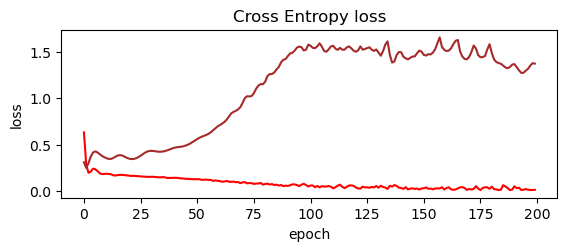

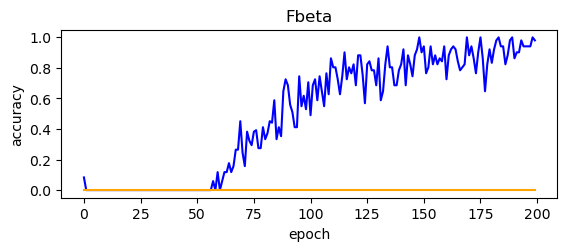

In [11]:

# baseline model with data augmentation for the landscape dataset
import sys
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\land.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# calculate fbeta score for multi-label classification
def fbeta(y_true, y_pred, beta=1):
	# clip predictions
	y_pred = backend.clip(y_pred, 0, 1)
	# calculate elements
	tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + backend.epsilon())
	# calculate recall
	r = tp / (tp + fn + backend.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 10
	fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
	return fbeta_score
 
# define cnn model
def define_model(in_shape=(128, 128, 3), out_shape=23):
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=in_shape))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(out_shape, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(212)
    pyplot.title('Cross Entropy loss')
    pyplot.plot(history.history['loss'], color='red', label='train')
    pyplot.plot(history.history['val_loss'], color='brown', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('loss')
    pyplot.show()
    # plot accuracy
    pyplot.subplot(211)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='blue', label='train')
    pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('accuracy')
    pyplot.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0, horizontal_flip=True, vertical_flip=True, rotation_range=90)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow(trainX, trainY, batch_size=128)
    test_it = test_datagen.flow(testX, testY, batch_size=128)
    # define model
    model = define_model()
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=200, verbose=0)
    # evaluate model
    loss, fbeta = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))
    accuracy, val_fbeta = model.evaluate_generator(train_it, steps=len(train_it), verbose=0)
    print('> accuracy=%.3f, val_fbeta=%.3f' % (accuracy, val_fbeta))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
> loss=5.051, fbeta=0.000
> accuracy=0.000, val_fbeta=1.000


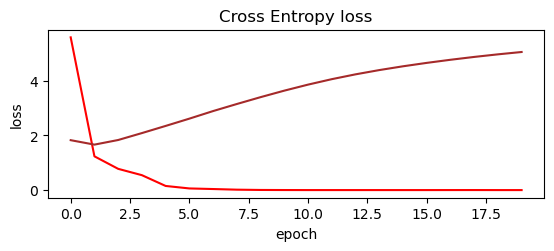

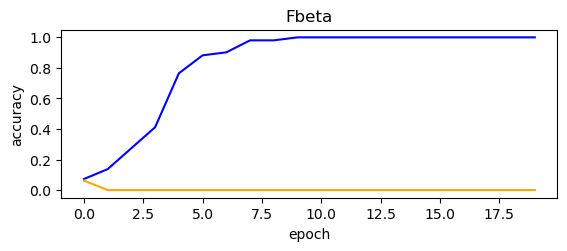

In [13]:
# vgg16 transfer learning on the landscape dataset
import sys
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\land.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# calculate fbeta score for multi-label classification
def fbeta(y_true, y_pred, beta=1):
	# clip predictions
	y_pred = backend.clip(y_pred, 0, 1)
	# calculate elements
	tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + backend.epsilon())
	# calculate recall
	r = tp / (tp + fn + backend.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 10
	fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
	return fbeta_score
 
# define cnn model
def define_model(in_shape=(128, 128, 3), out_shape=23):
	# load model
	model = VGG16(include_top=False, input_shape=in_shape)
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(out_shape, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(212)
    pyplot.title('Cross Entropy loss')
    pyplot.plot(history.history['loss'], color='red', label='train')
    pyplot.plot(history.history['val_loss'], color='brown', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('loss')
    pyplot.show()
    # plot accuracy
    pyplot.subplot(211)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='blue', label='train')
    pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('accuracy')
    pyplot.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterators
    train_it = datagen.flow(trainX, trainY, batch_size=128)
    test_it = datagen.flow(testX, testY, batch_size=128)
    # define model
    model = define_model()
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)
    # evaluate model
    loss, fbeta= model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))
    accuracy, val_fbeta= model.evaluate_generator(train_it, steps=len(train_it), verbose=0)
    print('> accuracy=%.3f, val_fbeta=%.3f' % (accuracy, val_fbeta))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

(17, 128, 128, 3) (17, 23) (8, 128, 128, 3) (8, 23)
> loss=nan, fbeta=0.500
> accuracy=nan, val_fbeta=nan


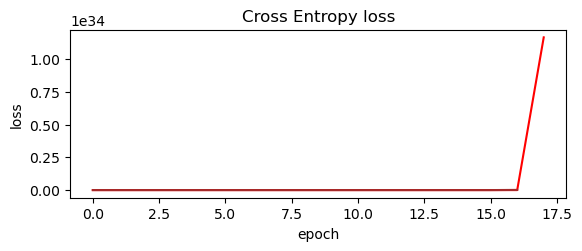

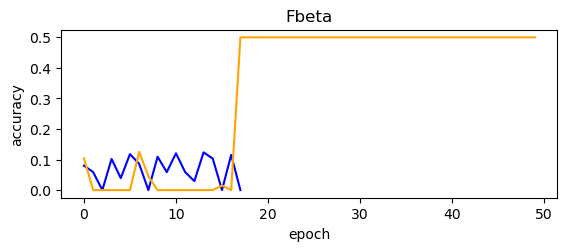

In [15]:
# vgg with fine-tuning and data augmentation for the landscape dataset
import sys
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
 
# load train and test dataset
def load_dataset():
	# load dataset
	data = load(r'C:\Users\pc\Desktop\LANDSCAPE\land.zip')
	X, y = data['arr_0'], data['arr_1']
	# separate into train and test datasets
	trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
	print(trainX.shape, trainY.shape, testX.shape, testY.shape)
	return trainX, trainY, testX, testY
 
# calculate fbeta score for multi-label classification
def fbeta(y_true, y_pred, beta=1):
	# clip predictions
	y_pred = backend.clip(y_pred, 0, 1)
	# calculate elements
	tp = backend.sum(backend.round(backend.clip(y_true * y_pred, 0, 1)), axis=1)
	fp = backend.sum(backend.round(backend.clip(y_pred - y_true, 0, 1)), axis=1)
	fn = backend.sum(backend.round(backend.clip(y_true - y_pred, 0, 1)), axis=1)
	# calculate precision
	p = tp / (tp + fp + backend.epsilon())
	# calculate recall
	r = tp / (tp + fn + backend.epsilon())
	# calculate fbeta, averaged across each class
	bb = beta ** 10
	fbeta_score = backend.mean((1 + bb) * (p * r) / (bb * p + r + backend.epsilon()))
	return fbeta_score
 
# define cnn model
def define_model(in_shape=(128, 128, 3), out_shape=23):
	# load model
	model = VGG16(include_top=False, input_shape=in_shape)
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# allow last vgg block to be trainable
	model.get_layer('block5_conv1').trainable = True
	model.get_layer('block5_conv2').trainable = True
	model.get_layer('block5_conv3').trainable = True
	model.get_layer('block5_pool').trainable = True
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(out_shape, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(212)
    pyplot.title('Cross Entropy loss')
    pyplot.plot(history.history['loss'], color='red', label='train')
    pyplot.plot(history.history['val_loss'], color='brown', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('loss')
    pyplot.show()
    # plot accuracy
    pyplot.subplot(211)
    pyplot.title('Fbeta')
    pyplot.plot(history.history['fbeta'], color='blue', label='train')
    pyplot.plot(history.history['val_fbeta'], color='orange', label='test')
    pyplot.xlabel('epoch')
    pyplot.ylabel('accuracy')
    pyplot.show()
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename + '_plot.png')
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # create data generator
    train_datagen = ImageDataGenerator(featurewise_center=True, horizontal_flip=True, vertical_flip=True, rotation_range=90)
    test_datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    train_datagen.mean = [123.68, 116.779, 103.939]
    test_datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterators
    train_it = train_datagen.flow(trainX, trainY, batch_size=128)
    test_it = test_datagen.flow(testX, testY, batch_size=128)
    # define model
    model = define_model()
    # fit model
    history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=0)
    # evaluate model
    loss, fbeta = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
    print('> loss=%.3f, fbeta=%.3f' % (loss, fbeta))
    accuracy, val_fbeta= model.evaluate_generator(train_it, steps=len(train_it), verbose=0)
    print('> accuracy=%.3f, val_fbeta=%.3f' % (accuracy, val_fbeta))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()